In [12]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob

In [13]:
img_list = glob.glob('D://test//input//*.png')
GMM_list = glob.glob('D://test//output//*.png')
DL_list = glob.glob('D://pred_test//*.png')

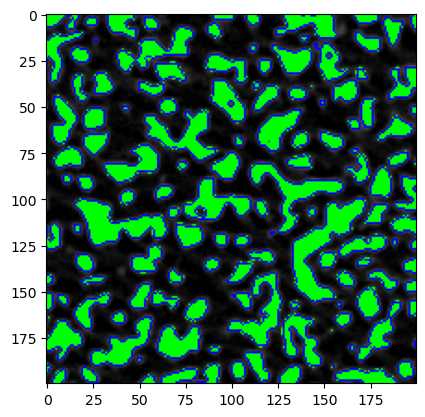

In [16]:
# checking specific number of image 
n = 0
img =  cv2.imread(img_list[n])
GMM =  cv2.imread(GMM_list[n], cv2.IMREAD_GRAYSCALE)
DL =  cv2.imread(DL_list[n], cv2.IMREAD_GRAYSCALE)

# binarization of the GMM image (as it was downsampled then it is not binary)
GMM = GMM / GMM.max()
GMM [GMM> 0.5] = 1
GMM [GMM <= 0.5] = 0
GMM = GMM.astype('uint8')

# producing ground truth lines
cnts, hierarchy = cv2.findContours(GMM, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, cnts, -1, (0,255,0), 1)

# producing the model lines
cnts, hierarchy = cv2.findContours(DL, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, cnts, -1, (0,0,255), 1)

# saving the image
cv2.imwrite( 'test.png',img )

#showing a part of image
plt.imshow(img[1000:1200,1000:1200])
